In [1]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import numpy.linalg as LA
seaborn.set()

## Discret Approximation of an AR(1) process
Assume that a random variable evolves according to the following continous AR(1) process.<br>
\begin{equation}\tag{1}
z_{t+1} = \rho z_t + (1-\rho) \mu + \varepsilon_t \  s.t. \rho \in (-1,1), \varepsilon_t \sim N(0, \delta) 
\end{equation}
where $\rho$ governs the persistence of the process, and $\mu$ is the long-run average of $z_{t}$, and $\delta$ is the standard deviation of the normally distributed terms. Assume that $\rho =0.85, \mu= 11.4, \delta =0.7$ <br>
### (a) Assume that $z_0 =\mu$. Simulate a time series of 500 period of $\{z_t\}_{t=1}^T$ using equation (1)


In [2]:
T = 500
sigma = 0.7
mu= 11.4
rho = 0.85
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [3]:
# Simulate 500 of zt
z = np.zeros(T)
for i in range(T):
    if i == 0:
        z[i] = rho
    else:
        z[i] = rho * z[i-1] + (1- rho) * mu + eps_vec[i]

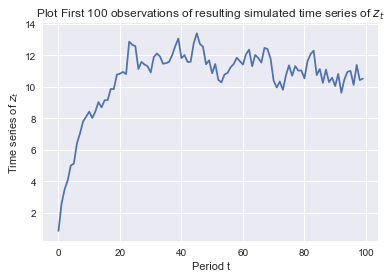

In [4]:
plt.plot(z[:100])
plt.title("Plot First 100 observations of resulting simulated time series of $z_t$")
plt.ylabel("Time series of $z_t$")
plt.xlabel("Period t")
plt.show()

### (b) Creat a 5-element vector called z_vals that represents a discretized version of all values that zt can take on
### and z_vals be 5 evenly spaced point between mu - 3 delta, and mu + 3 delta

In [5]:
lower = mu - 3*sigma
upper = mu + 3*sigma
z_vals = np.array([lower, lower + 1.5 * sigma, mu, mu + 1.5 * sigma, upper])
z_vals

array([ 9.3 , 10.35, 11.4 , 12.45, 13.5 ])

### (c) Estimate the probabilities of a 5 \times 5 Markow transition matrix $\hat{P}$ in the following way. Think of that values in the z_vals vector 

In [6]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
z_cuts

array([ 9.825, 10.875, 11.925, 12.975])

In [7]:
bins = np.digitize(z, z_cuts)
P_matrix = np.zeros(shape=(5,5))

In [8]:
for i in range(0,5):
    for j in range(0,5):
        count = 0
        total = 0
        for k in range(0,499):
            current = bins[k]
            nxt = bins[k+1]
            if current == i and nxt == j:
                count += 1
            if current == i:
                total += 1
        P_matrix[i][j] = count/total

In [9]:
P_matrix

array([[0.75757576, 0.21212121, 0.03030303, 0.        , 0.        ],
       [0.09821429, 0.51785714, 0.33928571, 0.04464286, 0.        ],
       [0.03184713, 0.22292994, 0.47770701, 0.23566879, 0.03184713],
       [0.        , 0.04273504, 0.34188034, 0.5042735 , 0.11111111],
       [0.        , 0.        , 0.04255319, 0.34042553, 0.61702128]])

### (d) According to your estimated Markov transition matrix $\hat{P}$, what is the probability $z_{t+3}$ being in bin 5 given $z_t$ in bin 3 today?

In [10]:
init_state = np.array([0,0,1,0,0]).reshape(5,1)
prob_two_steps = LA.matrix_power(P_matrix.T,3) @ init_state
print('Probability of going from state 3 to state 5 over 2 steps is', prob_two_steps[4])

Probability of going from state 3 to state 5 over 2 steps is [0.07800906]


### (e) According to your estimated Markov transition matrix $\hat{P}$, what is the stationary distribution of $z_t$

In [11]:
eigvals, eigvecmat = LA.eig(P_matrix.T)
print('Analytical Solution of the distribution should converge to',eigvals)

Analytical Solution of the distribution should converge to [0.10863411 1.         0.36552089 0.79420747 0.60607221]


### the eigenvector associated with $\lambda = 1$

In [12]:
eigvec = eigvecmat[:, 1] / eigvecmat[:, 1].sum()
eigvec

array([0.13226453, 0.2244489 , 0.31462926, 0.23446894, 0.09418838])

### Calculate the value through iterations

In [17]:
current_state = np.array([0, 0, 1, 0, 0]).reshape(5,1)
tolerance = 1e-10
difference = 1

while change > tolerance:
    next_state = P_matrix.T @ cur_state 
    difference = LA.norm(next_state - cur_state)
    cur_state = next_state

In [18]:
print("The iteration result of state distribution converges to: \n" + str(next_state))

The iteration result of state distribution converges to: 
[[0.13226453]
 [0.2244489 ]
 [0.31462926]
 [0.23446894]
 [0.09418838]]


### (f) Use the vector of T uniformly distributed variables in unif_vec from part (a) to simulate T values of discretized version of $z_t \in$ z_val using the estimated transition matrix $\hat{P}$ and initial value $z_0 = $ z_vals using the transition matrix $\hat{P}$ and initial value $z_o = $ z_vals[2].

In [15]:
z_vec = np.zeros(T)
z_t = z_vals[2]
zt_ind = 1
for t_ind in range(T):
    ztp1_ind = np.argwhere(unif_vec[t_ind] <= np.cumsum(P_matrix[zt_ind, :])).min()
    z_tp1 = z_vals[ztp1_ind]
    z_vec[t_ind] = z_tp1
    z_t = z_tp1
    zt_ind = ztp1_ind

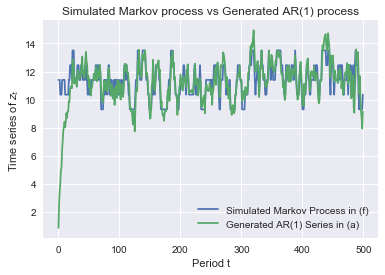

In [16]:
plt.plot(z_vec)
plt.plot(z)
plt.title('Simulated Markov process vs Generated AR(1) process')
plt.xlabel('Period t')
plt.ylabel("Time series of $z_t$")
plt.legend(['Simulated Markov Process in (f)', 'Generated AR(1) Series in (a)'])
plt.show()